In [12]:
import csv
import pandas as pd
import numpy as np
import plotly
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

### Data preprocessing
- Storing x-values and target-values
- Tranforming M/B to binary 1/0
- Normalize data
- Split in training and test set

In [2]:
data = pd.read_csv("/Users/anineahlsand/iCloud Drive (arkiv)/Documents/Dokumenter/Documents/Skole/NTNU/Maskinlæring/Project/ML-Project/data/data.csv")
x = data.iloc[:,2:32].values
y = data.iloc[:,1:2].values

encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1)

## Plotting data

In [171]:
radius = data['radius_mean']
texture = data['texture_mean']
compactness = data['compactness_mean']
concavity = data['concavity_mean']
diagnosis = data['diagnosis']
for i in range(len(diagnosis)):
    if diagnosis[i] == 'B':
        diagnosis[i] = 0
    elif diagnosis[i] == 'M':
        diagnosis[i] = 1
        
bengin_rad = []
bengin_tex = []
bengin_com = []
bengin_con = []
malignant_rad = []
malignant_tex = []
malignant_com = []
malignant_con = []
for i in range(len(radius)):
    if data.iloc[i,1] == 'B':
        bengin_rad.append(radius[i])
        bengin_tex.append(texture[i])
        bengin_com.append(compactness[i])
        bengin_con.append(concavity[i])
    elif data.iloc[i,1] == 'M':
        malignant_rad.append(radius[i])
        malignant_tex.append(texture[i])
        malignant_com.append(compactness[i])
        malignant_con.append(concavity[i])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D as ax

fig = plt.figure()
ax = fig.gca(projection='3d')
sc = ax.scatter(radius, texture, compactness, c=diagnosis, marker='o', s=10, cmap="coolwarm")
plt.title('')
ax.set_xlabel('Radius')
ax.set_ylabel('Texture')
ax.set_zlabel('Conpactness')

plt.show()

In [ ]:
markercolor_bengin = bengin_com
markercolor_malignant = malignant_com
fig1 = go.Figure(data=go.Scatter3d(x=bengin_rad,
                    y=bengin_tex,
                    z=bengin_con,
                    marker=dict(color=diagnosis,
                                opacity=1,
                                reversescale=True,
                                colorscale='greens',
                                size=3),
                    line=dict (width=0.02),
                    mode='markers'))
# fig1 = go.Figure(data=go.Scatter3d(x=malignant_rad,
#                     y=malignant_tex,
#                     z=malignant_con,
#                     marker=dict(color=markercolor,
#                                 opacity=1,
#                                 reversescale=True,
#                                 colorscale='reds',
#                                 size=3),
#                     line=dict (width=0.02),
#                     mode='markers'))

mylayout = go.Layout(scene=dict(xaxis=dict( title="Radius"),
                                yaxis=dict( title="Texture"),
                                zaxis=dict(title="Concavity")),)

In [ ]:
area = data['area_mean']
radius = data['radius_mean']
texture = data['texture_mean']

bengin_a = []
bengin_tex = []
malignant_a = []
malignant_tex = []
for i in range(len(area)):
    if data.iloc[i,1] == 'B':
        bengin_a.append(area[i])
        bengin_tex.append(texture[i])
    elif data.iloc[i,1] == 'M':
        malignant_a.append(area[i])
        malignant_tex.append(texture[i])

plt.scatter(bengin_a, bengin_tex, color='g')
plt.scatter(malignant_a, malignant_tex, color='r')
plt.title('Area vs. texture')
plt.ylabel('Texture mean')
plt.xlabel('Area mean')
plt.legend(['Bengin', 'Malignant'], loc='upper left')
plt.show()

In [ ]:
area = data['area_mean']
smoothness = data['smoothness_mean']

bengin_a = []
bengin_s = []
malignant_a = []
malignant_s = []
for i in range(len(area)):
    if data.iloc[i,1] == 'B':
        bengin_a.append(area[i])
        bengin_s.append(smoothness[i])
    elif data.iloc[i,1] == 'M':
        malignant_a.append(area[i])
        malignant_s.append(smoothness[i])

plt.scatter(bengin_a, bengin_s, color='g')
plt.scatter(malignant_a, malignant_s, color='r')
plt.title('Area vs. smoothness')
plt.ylabel('Smoothness mean')
plt.xlabel('Area mean')
plt.legend(['Bengin', 'Malignant'], loc='upper left')
# plt.show()

In [ ]:
comp = data['compactness_mean']
conc = data['concavity_mean']

bengin_comp = []
bengin_conc = []
malignant_comp = []
malignant_conc = []
for i in range(len(comp)):
    if data.iloc[i,1] == 'B':
        bengin_comp.append(comp[i])
        bengin_conc.append(conc[i])
    elif data.iloc[i,1] == 'M':
        malignant_comp.append(comp[i])
        malignant_conc.append(conc[i])

plt.scatter(bengin_comp, bengin_conc, color='g')
plt.scatter(malignant_comp, malignant_conc, color='r')
plt.title('Compactness vs. concavity')
plt.ylabel('Concavity mean')
plt.xlabel('Compactness mean')
plt.legend(['Bengin', 'Malignant'], loc='upper left')
plt.show()

In [ ]:
p = data['perimeter_mean']
c = data['concave points_mean']

bengin_p = []
bengin_c = []
malignant_p = []
malignant_c = []
for i in range(len(p)):
    if data.iloc[i,1] == 'B':
        bengin_p.append(p[i])
        bengin_c.append(c[i])
    elif data.iloc[i,1] == 'M':
        malignant_p.append(p[i])
        malignant_c.append(c[i])

plt.scatter(bengin_p, bengin_c, color='g')
plt.scatter(malignant_p, malignant_c, color='r')
plt.title('Perimeter vs. concave points')
plt.ylabel('Concave points mean')
plt.xlabel('Perimeter mean')
plt.legend(['Bengin', 'Malignant'], loc='upper left')
# plt.show()

### Building model

In [251]:
data = pd.read_csv("/Users/anineahlsand/iCloud Drive (arkiv)/Documents/Dokumenter/Documents/Skole/NTNU/Maskinlæring/Project/ML-Project/data/data.csv")
x = data.iloc[:,2:32].values
y = data.iloc[:,1:2].values
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()
sc = StandardScaler()
x = sc.fit_transform(x)
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1)

In [252]:
opt = SGD(lr=0.01, nesterov=True)
model = Sequential()
model.add(Dense(units=32, input_shape=(30,), activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

### Training model

In [253]:
#trained_with_val = model.fit(x_train, y_train, shuffle='Logical',validation_split = 0.2,epochs=100, batch_size=32)
trained_with_val = model.fit(x_train, y_train, shuffle='Logical',epochs=100, batch_size=32)

Epoch 1/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7461 - accuracy: 0.4395
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6817 - accuracy: 0.6055
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6465 - accuracy: 0.7148
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.7871
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5881 - accuracy: 0.8223
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.8438
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.8613
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.8789
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4627 - accuracy: 0.8887
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.9004
Epoch 11/

In [254]:
y_pred = model.predict(x_test)

In [255]:
#Converting predictions to label
predictions = []
for i in range(len(y_pred)):
    predictions.append(np.argmax(y_pred[i]))
#Converting one hot encoded test label to label
test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [256]:
accuracy = accuracy_score(test,predictions)
precision =precision_score(test,predictions)
recall = recall_score(test,predictions)
f1 = f1_score(test,predictions)

print('Accuracy is:', accuracy*100)
print('Precision is:', precision*100)
print('Recall is:', recall*100)
print('F1 is:', f1*100)

Accuracy is: 98.24561403508771
Precision is: 95.65217391304348
Recall is: 100.0
F1 is: 97.77777777777777


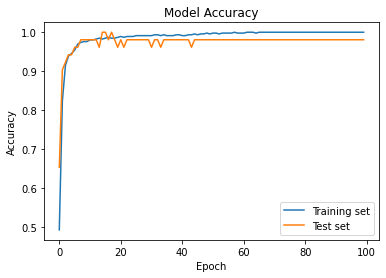

In [148]:
plt.plot(trained_with_val.history['accuracy'])
plt.plot(trained_with_val.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='lower right')
plt.show()

In [39]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

Confusion matrix, without normalization
[[64  3]
 [ 2 45]]


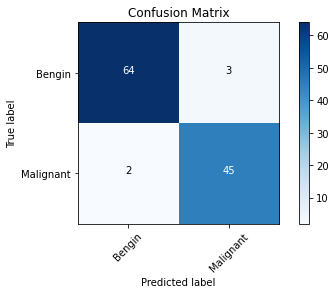

In [40]:
cm = confusion_matrix(y_true=test, y_pred=predictions)
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cm_plot_labels = ['Bengin','Malignant']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
plt.plot(y_pred, color='r')
plt.plot(y_test, color='b')
plt.show()